In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
salary_data = pd.read_csv('salary.csv', thousands=',')

In [229]:
salary_data;  #let's look at our data

In [230]:
salary_data['Location'];  # DataFrames object
salary_data.Location;     # Series object
salary_data[['Location', 'Title']];  #looking at two columns at the same time.

In [231]:
# filtering for specific values
salary_data[salary_data.Location == 'San Diego'];

In [232]:
"""
Let's make an analysis on payment. First get rid of gross pay column,
merge three columns into one in order to find total payment for individuals.
"""
del salary_data['GrossPay'];
# Turning pay columns into numeric ones and create TotalPay column:
salary_data[['RegularPay', 'OvertimePay', 'OtherPay']] = salary_data[['RegularPay', 'OvertimePay', 'OtherPay']].apply(pd.to_numeric)  
salary_data['TotalPay'] = salary_data['RegularPay'] + salary_data['OvertimePay'] + salary_data['OtherPay']

In [233]:
# How many different titles do we have in our data?
titles = set(salary_data['Title'])
len(titles)  # 1481 different titles.
# However, we only care about the professors, so let's just use this data.
salary_data_professors = salary_data[salary_data['Title'].str.contains("PROF")]
len(salary_data_professors);  # 3182 professors we have.
# We can now examine how many different professor titles
professor_titles = set(salary_data_professors['Title'])
len(professor_titles);  # 86 different professor titles

# Let's examine the professors by their titles (i.e. assoc, asst, prof)
assoc_prof = salary_data_professors[salary_data_professors['Title'].str.contains('ASSOC')]
assist_prof = salary_data_professors[salary_data_professors['Title'].str.contains('ASST')]
full_prof = pd.concat([salary_data_professors, assoc_prof]).drop_duplicates(keep=False)
full_prof = pd.concat([prof, assist_prof]).drop_duplicates(keep=False)

In [241]:
def draw_histogram(pay_data, color):
    """
    This function depicts the histogram using the data provided
    """
    color = "tab:" + color
    plt.figure(figsize=(12,8))
    plt.ylabel('Count', fontsize=16)
    plt.xlabel('TotalPay', fontsize=16)
    sns.distplot(total_payment, bins=20, kde=False, color=color)

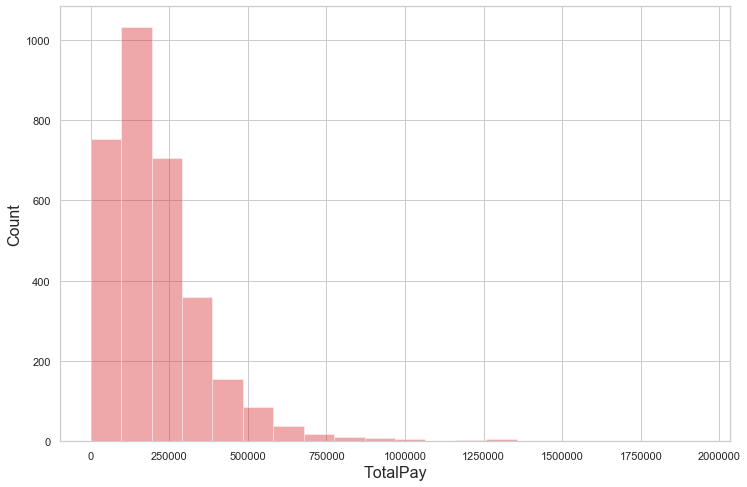

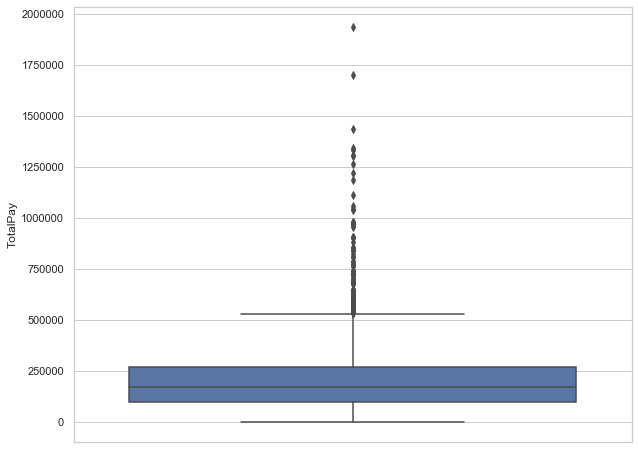

In [242]:
# We can now look at some basic statistics about professor salaries in broad sense.
total_payment = salary_data_professors['TotalPay']
total_payment.dropna()  # eliminate na rows 
total_payment.mean();  # 206741 $
total_payment.max();   # 1936497 $
total_payment.min();   # 344 $

# Let's visualize our total pay data
draw_histogram(total_payment, 'red')

# Boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='TotalPay',data=salary_data_professors, orient="v")
# boxplot with respect to professor titles:
# ax = sns.boxplot(x='Title',y='TotalPay',data=salary_data_professors, orient="v")

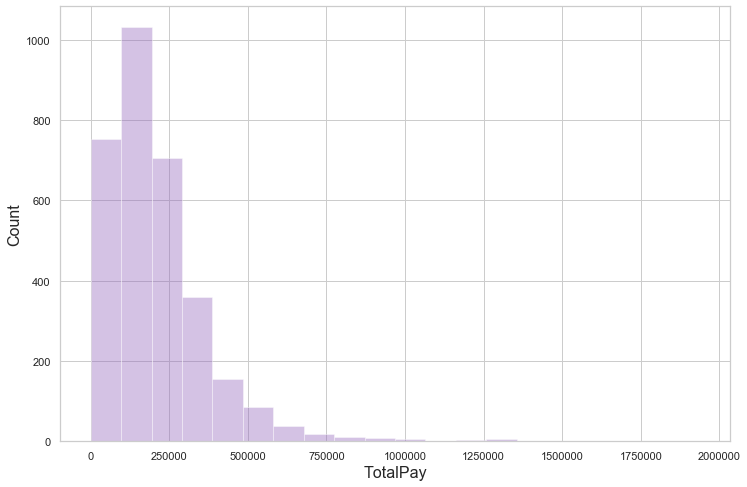

In [244]:
# Assistant Professor analysis 
total_payment_assist = assist_prof['TotalPay']
total_payment_assist.dropna()  # eliminate na rows 
total_payment_assist.mean()  # 169362 $
total_payment_assist.max()   # 976604 $
total_payment_assist.min()   # 363 $

# Let's visualize our total pay data
draw_histogram(total_payment_assist, 'purple')

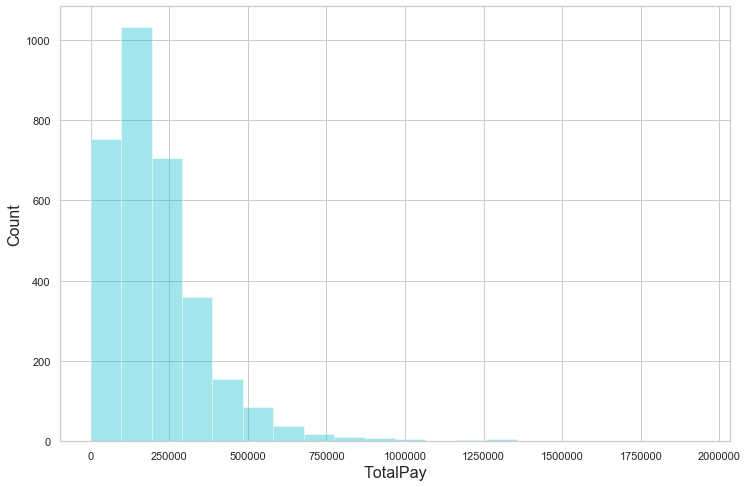

In [245]:
# Associate Professor analysis 
total_payment_assoc = assoc_prof['TotalPay']
total_payment_assoc.dropna()  # eliminate na rows 
total_payment_assoc.mean()  # 210413 $
total_payment_assoc.max()   # 1340678 $
total_payment_assoc.min()   # 495 $

# Let's visualize our total pay data
draw_histogram(total_payment_assoc, 'cyan')

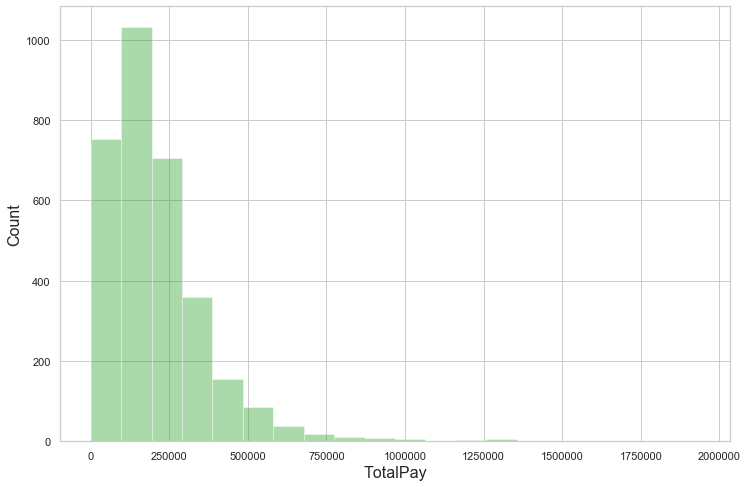

In [246]:
# Full Professor analysis 
total_payment_prof = full_prof['TotalPay']
total_payment_prof.dropna()  # eliminate na rows 
total_payment_prof.mean()  # 205861 $
total_payment_prof.max()   # 1936497 $
total_payment_prof.min()   # 344 $

# Let's visualize our total pay data
draw_histogram(total_payment_assoc, 'green')